
# CDC Diabetes Health Indicators Analysis

This project explores data from the CDC BRFFS 2015 (Behavioral Risk Factor Surveillance System) which presents enough data and features to analyze key health indicators related to diabetes. The goal is to identify potential correlations and risk factors, and to build predictive models that can help assess an individual's likelihood of developing diabetes based on various lifestyle and demographic features with an accent on the socio-economic part.

The analysis includes exploratory data visualization, statistical testing, and machine learning classification. The results aim to provide insights into which factors most strongly influence diabetes prevalence and to demonstrate how data science can support public health understanding and indicate on how we can proceed in the future

We first start by importing all of the necessary libraries and then we'll adress the research questions for this report.


In [124]:

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Research questions:   
1.Is the level of education reflected in wealth?

2.How big is the impact of education and wealth on diabetes? 

3.Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?

4.Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes
or is at high risk of diabetes?

Before starting to adress the first research question we start by loading up the dataset and checking how the data looks along with getting some information about the data.(seeing how we should preprocess the data)

In [125]:
df_diabetes = pd.read_csv("data\\diabetes_012_health_indicators_BRFSS2015.csv")
df_diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [126]:
df_diabetes.info()
df_diabetes.describe()
print(f"Number of null values: {df_diabetes.isnull().sum().sum()} ")
df_diabetes.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## Research Question: 1.Is the level of education reflected in wealth?

The data is processed which is perfect(same data types, no null values), this means we can start the exploratory analysis! We first begin with a heatmap of correlations in order to view important relations in the data and in order to start answering the first research question!

<Axes: >

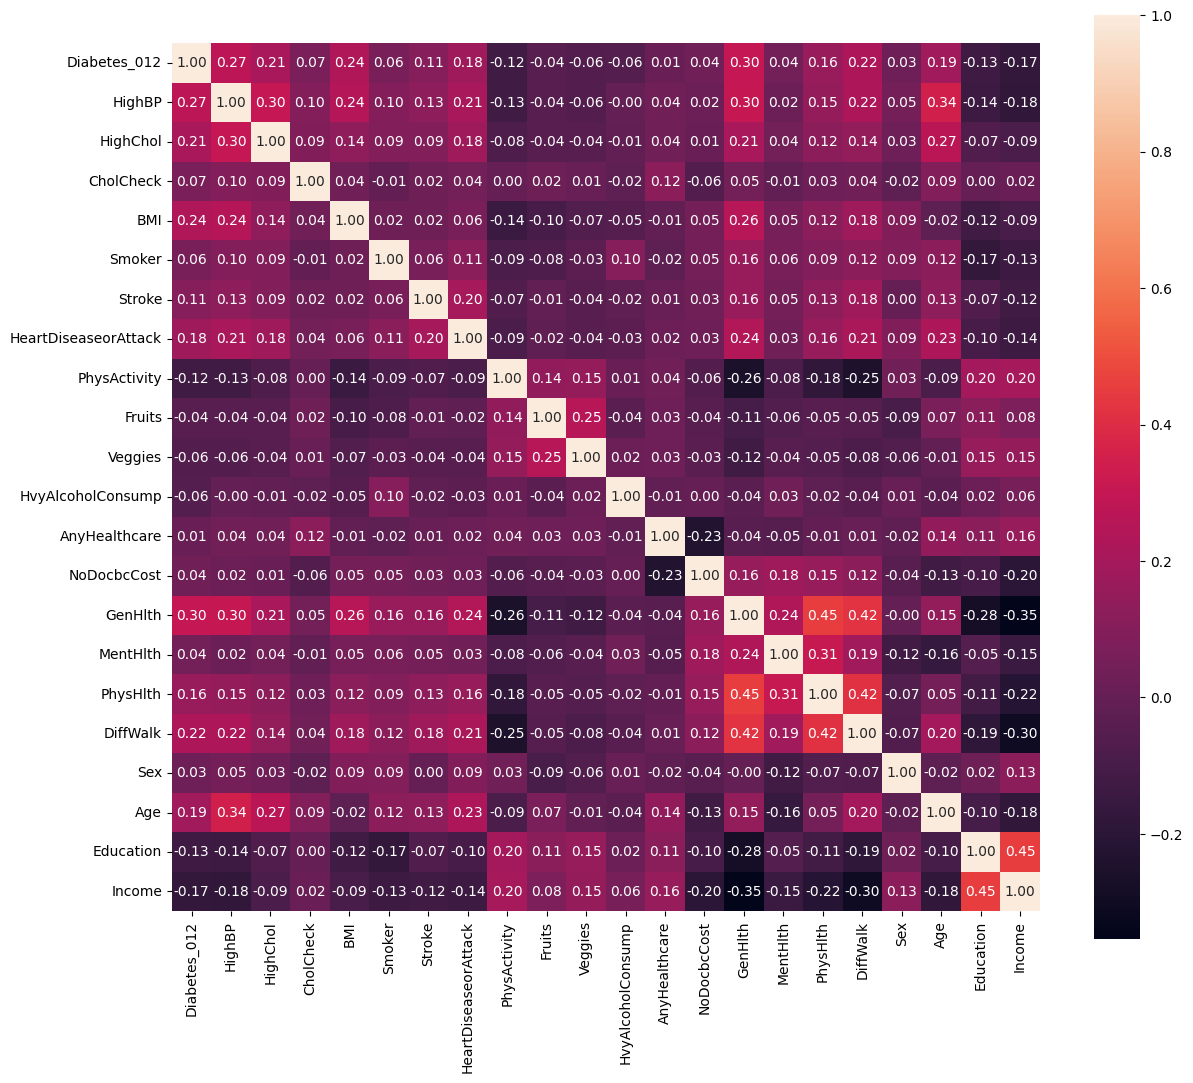

In [127]:
correlation_matrix= df_diabetes.corr("spearman");


plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, square=True,fmt=".2f")

We now look deeper in order to see the data that is related to our research question.

Text(0.5, 0.98, 'Education / Income correlation')

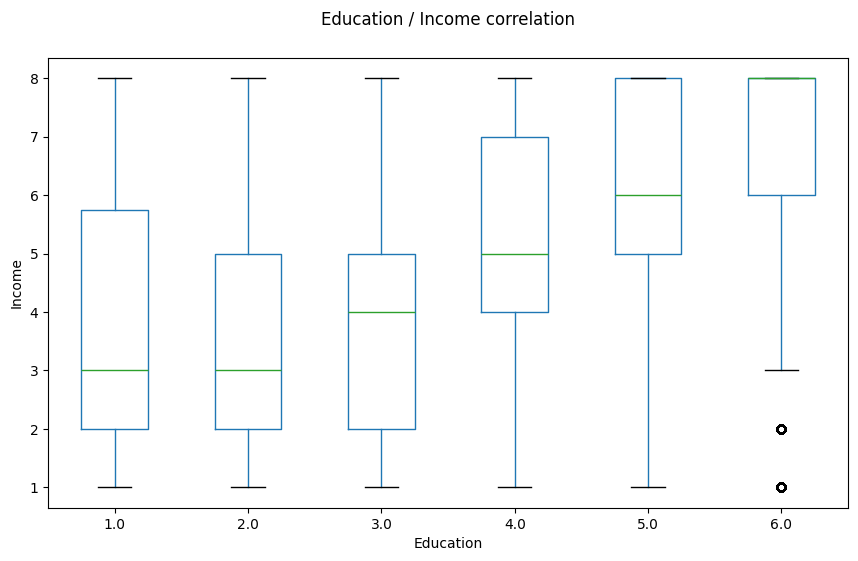

In [128]:
df_diabetes.boxplot(column="Income", by="Education",grid=False,figsize=(10,6))
plt.ylabel('Income')
plt.title(" ")
plt.suptitle("Education / Income correlation")

After examining the boxplot, I decided that the most appropriate statistical test to use is the Spearman rank correlation coefficient. This choice is motivated by two key observations: first, both the Education and Income variables are measured on an ordinal scale, meaning they represent ranked categories rather than continuous values. Second, the boxplot suggests a non-linear but monotonic relationship between the two variables. Thus we proceed to apply the test taking H0 as:There is no association between education and income levels (ρ = 0).

In [129]:
spearman_corr, spearman_p = stats.spearmanr(df_diabetes["Education"], df_diabetes["Income"])    
print(f"The Spearman Correlation is: {spearman_corr:.3f}, and the p-value is: {spearman_p:.4f}")

The Spearman Correlation is: 0.452, and the p-value is: 0.0000


With these results we can confidently reject the null hypothesis and answer the first research question knowing that there is a positive association between education and income.

# Research Question: 2.How big is the impact of education and wealth on diabetes? 

Now in order to answer the second question we need to answer a kind of subquestion, that being "Do features that are strongly correlated with diabetes also tend to be correlated with income or education?" , and since we know that income are positively correlated with each other we can look at both of them and see how much they affect diabetes.


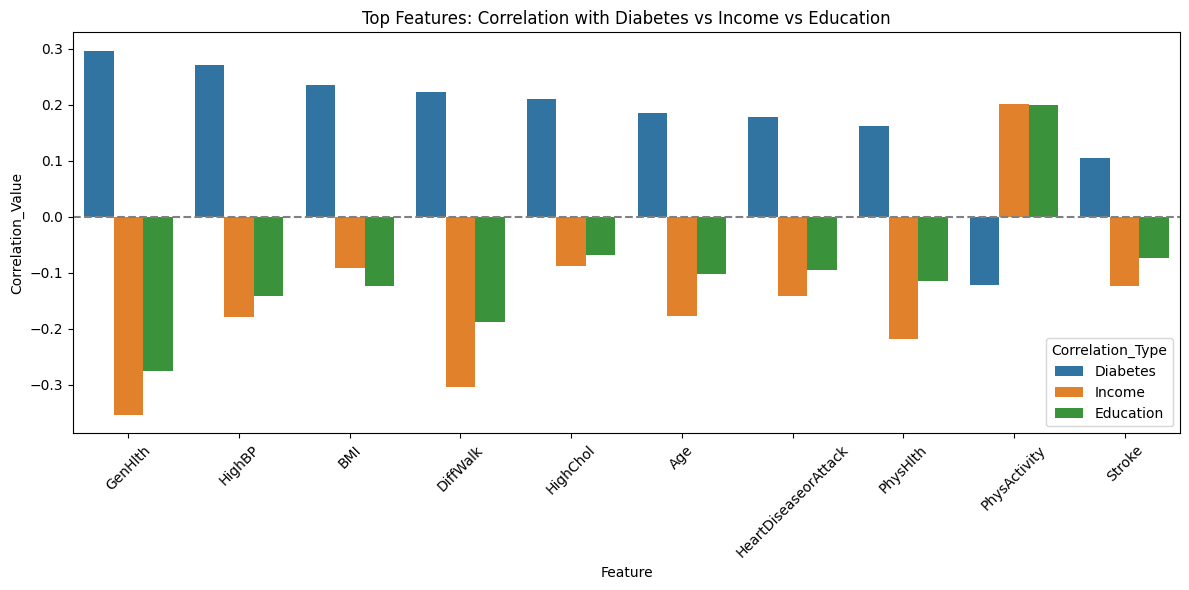

In [130]:
diabetes_corr = correlation_matrix["Diabetes_012"]
income_corr = correlation_matrix["Income"]
education_corr = correlation_matrix["Education"]

# Combine into a DataFrame
combined_corrs = pd.DataFrame({
    "Diabetes": diabetes_corr,
    "Income": income_corr,
    "Education": education_corr
})

# Drop the rows for the main variables themselves
combined_corrs = combined_corrs.drop(["Income", "Education", "Diabetes_012"])
# Reshape the data for side-by-side bar plot
plot_data = combined_corrs[["Diabetes", "Income", "Education"]]
plot_data = plot_data.sort_values(by="Diabetes", key=abs, ascending=False).head(10)  # Top 10 for clarity
plot_data = plot_data.reset_index().melt(id_vars="index", value_vars=["Diabetes", "Income", "Education"])
plot_data.columns = ["Feature", "Correlation_Type", "Correlation_Value"]

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x="Feature", y="Correlation_Value", hue="Correlation_Type")
plt.xticks(rotation=45)
plt.title("Top Features: Correlation with Diabetes vs Income vs Education")
plt.axhline(0, color="gray", linestyle="--")
plt.tight_layout()
plt.show()



In [131]:
income_diabetes_corr = combined_corrs["Diabetes"].corr(combined_corrs["Income"], method="spearman")
education_diabetes_corr = combined_corrs["Diabetes"].corr(combined_corrs["Education"], method="spearman")

print(f"Income Correlation to diabetes is {income_diabetes_corr:.3f}")
print(f"Education Correlation to diabetes is {education_diabetes_corr:.3f}")

Income Correlation to diabetes is -0.740
Education Correlation to diabetes is -0.853


We explored whether the risk factors for diabetes were also associated with income and education levels. By calculating Spearman correlations between the feature correlations with diabetes and their correlations with income and education, we found strong negative relationships:

Income vs. Diabetes-Related Features: -0.740

Education vs. Diabetes-Related Features: -0.853

These results suggest that the health indicators most strongly linked to diabetes — such as BMI, poor physical health, and general health — are more common among individuals with lower income and lower education. This highlights potential socioeconomic disparities in diabetes risk.

To further validate these results, we will perform a Spearman rank-order correlation test to assess the statistical significance of these relationship with the null hypothesis being that there is no correlation.

In [132]:
# Use Spearman to test correlation between correlation patterns
r_income, p_income = stats.spearmanr(combined_corrs["Diabetes"], combined_corrs["Income"])
r_edu, p_edu = stats.spearmanr(combined_corrs["Diabetes"], combined_corrs["Education"])

print(f"Spearman - Diabetes and Income: ρ = {r_income:.3f}, p = {p_income:.4f}")
print(f"Spearman - Diabetes and Education: ρ = {r_edu:.3f}, p = {p_edu:.4f}")

Spearman - Diabetes and Income: ρ = -0.740, p = 0.0003
Spearman - Diabetes and Education: ρ = -0.853, p = 0.0000


The results of the Spearman rank-order correlation test confirm that the negative relationships observed between diabetes-related features and both income and education are statistically significant. Specifically, the correlation between the diabetes-related feature pattern and income was ρ = -0.740 with a p-value = 0.0003, while the correlation with education was even stronger at ρ = -0.853 with a p-value < 0.0001. These low p-values indicate that there is a very low probability that these correlations occurred by chance. Therefore, we can reject the null hypothesis and conclude that features associated with diabetes are meaningfully and inversely related to income and education, providing strong support for the presence of socioeconomic disparities in diabetes risk.

# Research Question: 3.Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?


In order to answer the third Research Question we first need to process the column of Diabetes and turn into binary in order to simplify the classes (we can do this since we know that pre-diabetic people often advance into diabetic people, thus it's a very strong warning sign!). Thankfully the Dataset provided a binary representation as well, if not we would have to use operations on the column to turn anything that is above 0 to 1!

In [133]:
df_binary=pd.read_csv("data\\diabetes_binary_health_indicators_BRFSS2015.csv")
print(df_binary.__contains__(2))

False


After verifying that the csv file is indeed binary we can start building a Random Forest Classifier.

I chose a Random Forest Classifier for this project because it is a strong and reliable algorithm for making predictions. It works by building many decision trees and combining their results, which helps improve accuracy and reduces mistakes. Random Forest can handle different types of data, including numbers like BMI and categories like education level. It’s also good at dealing with messy or imbalanced data and can show which features are the most important for predicting diabetes. 

After creating the model it is going to be tested for balance, reliability, and risk prediction power using the scores of: ROC_AUC,  accuracy and f1.

In [ ]:

X=df_binary.drop(columns=["Diabetes_binary"])
Y=df_binary["Diabetes_binary"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)

y_pred = rf.predict(X_test)
f1 = f1_score(Y_test, y_pred)

print(f"F1 Score: {f1:.4f}")
print("Accuracy:", accuracy_score(Y_test,y_pred))
print("AUC:", roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1]))


F1 Score: 0.2539
Accuracy: 0.8598628192999054
AUC: 0.8016697951991739


The results above show high accuracy and AUC, but a low F1 score (0.25), which suggests that the model is likely biased toward the majority class (non-diabetic). This imbalance means it correctly identifies many negatives but struggles to catch true diabetic cases. To address this, we use the 50/50 class-balanced version of the dataset that was thankfully provided, which gives the model an equal chance to learn from both diabetic and non-diabetic cases. If such a dataset were not provided, we could manually balance it by undersampling the majority class or oversampling the minority class


In [135]:
df_binary=pd.read_csv("data\\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
print(df_binary["Diabetes_binary"].sum()*2==len(df_binary))

True


After confirming that the provided data is indeed a 50/50 split we can apply the Random Forest Classifier and check the scores again in order to confirm that the problem predicted is indeed the reason for the low f1 score.

In [136]:
df_binary=pd.read_csv("data\\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

X=df_binary.drop(columns=["Diabetes_binary"])
Y=df_binary["Diabetes_binary"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

f1 = f1_score(Y_test, y_pred)


print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(f"AUC:, {roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1]):.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7371
AUC:, 0.8090
F1 Score: 0.7475


After confirming that the model performs well on the balanced dataset, we proceeded to identify the top features contributing to diabetes prediction by examining the feature importances from the trained Random Forest model.

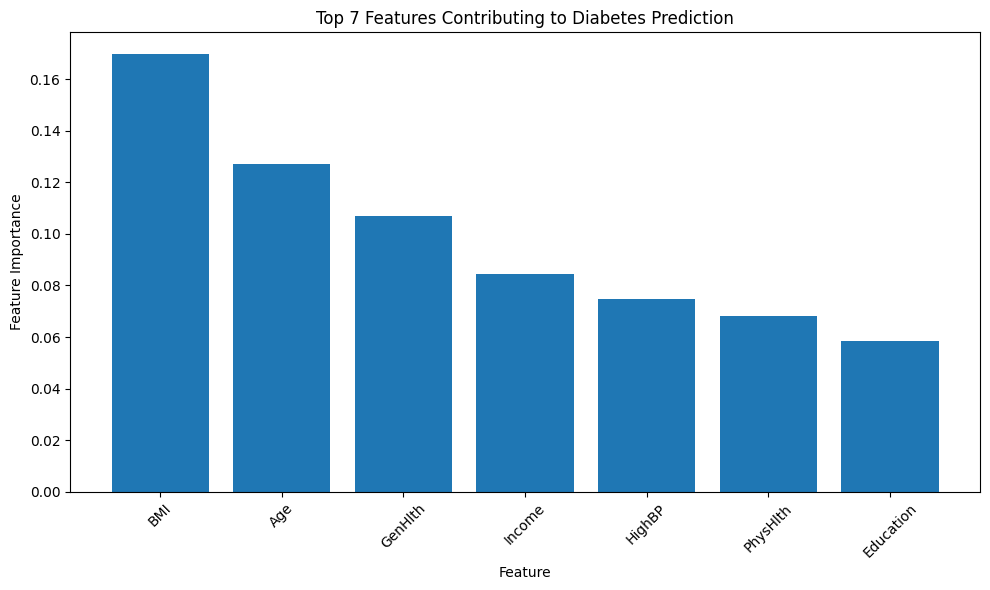


Top 7 Features:
       Feature  Importance
3         BMI    0.169663
18        Age    0.126936
13    GenHlth    0.107056
20     Income    0.084338
0      HighBP    0.074710
15   PhysHlth    0.068291
19  Education    0.058364
      Feature  Importance
3         BMI    0.169663
18        Age    0.126936
13    GenHlth    0.107056
20     Income    0.084338
0      HighBP    0.074710
15   PhysHlth    0.068291
19  Education    0.058364


In [ ]:
# Feature importances
feat_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_features = feat_importances.head(7)

plt.figure(figsize=(10, 6))
plt.bar(top_features["Feature"], top_features["Importance"])
plt.title("Top 7 Features Contributing to Diabetes Prediction")
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop 7 Features:\n", top_features)


With these top features we can create a new Random Forest Classifier that is a subset of the risk factors and analyze how good the model performs.

In [138]:

# Define top 7 feature names
top_features=top_features["Feature"].tolist()

# Create a new X with only these columns
X_short = df_binary[top_features]
y = df_binary["Diabetes_binary"]

# Split into training/testing sets
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(
    X_short, y, test_size=0.2, random_state=42
)

# Train the short-form model
rf_short = RandomForestClassifier(n_estimators=100, random_state=42)
rf_short.fit(X_train_short, y_train_short)

# Evaluate short-form model
y_pred_short = rf_short.predict(X_test_short)
accuracy_short = accuracy_score(y_test_short, y_pred_short)
auc_short = roc_auc_score(y_test_short, rf_short.predict_proba(X_test_short)[:, 1])
f1_short= f1_score(y_test_short, y_pred_short)

print(top_features)
print("Short Form Model Results:")
print(f"Accuracy: {accuracy_short:.4f}")
print(f"AUC: {auc_short:.4f}")
print(f"F1 Score: {f1_short:.4f}")


['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education']
Short Form Model Results:
Accuracy: 0.7046
AUC: 0.7682
F1 Score: 0.7118


The shortened model performed slightly lower than the full model (Accuracy: 0.7046, AUC: 0.7682, F1 Score: 0.7118 vs Accuracy: 0.7371, AUC: 0.8090, F1 Score: 0.7475), but still showed strong results. This means we can confidently say that a smaller set of key risk factors is still effective for accurately predicting whether an individual has diabetes!

# Research Question: 4.Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?

With the results that we have obtained whilst answering the previous question, we can easily create a questionnaire using the top 7 most important features. These features — such as BMI, Age, Income, Physical Health, General Health, Education, and Mental Health — can be used as a short form to screen individuals and predict whether they may have diabetes or are at high risk. This makes the model not only accurate but also practical for real-world health assessments.

In [140]:

# Ask the user for input based on top 7 features
bmi = float(input("What is your BMI? "))
age = int(input("What is your age group (e.g., 1=18-24, ..., 13=80+)? "))
gen_hlth = int(input("General health (1=Excellent to 5=Poor): "))
income = int(input("What is your income level (1=lowest, 8=highest)? "))
high_bp = int(input("Have you been told you have high blood pressure? (0=No, 1=Yes): "))
phys_hlth = int(input("How many days was your physical health not good in the past 30? "))
education = int(input("Education level (1=No school to 6=College grad): "))

# Create DataFrame for prediction
input_data = pd.DataFrame([{
    'BMI': bmi,
    'Age': age,
    'GenHlth': gen_hlth,
    'Income': income,
    'HighBP': high_bp,
    'PhysHlth': phys_hlth,
    'Education': education
}])

# Predict using the short-form model
prediction = rf_short.predict(input_data)[0]
probability = rf_short.predict_proba(input_data)[0][1]

label = "High Risk of Diabetes" if prediction == 1 else "Low Risk / Not Diabetic"
print(f"\n🧠 Prediction: {label}")
print(f"📊 Probability of being diabetic or at high risk: {probability:.2%}")



🧠 Prediction: High Risk of Diabetes
📊 Probability of being diabetic or at high risk: 84.00%



The questionnaire model was created based on the original BRFSS survey structure but refined using **feature selection**, allowing us to include only the most predictive questions. This approach keeps the questionnaire short and practical while maintaining strong accuracy in identifying individuals who may have diabetes or are at high risk.
The questionnaire could be improved by having caps on the values that can be inputed.

# Results
In this project, we used data from the CDC’s BRFSS 2015 survey to develop a machine learning model that can predict whether an individual is diabetic or at high risk of diabetes. After cleaning and preparing the data, we trained a Random Forest classifier on a binary target (0 = non-diabetic, 1 = pre-diabetic or diabetic). The full model, trained on all available features, achieved strong performance: an accuracy of 73.71%, an AUC of 0.8090, and an F1 score of 0.7475. To make the model more practical and user-friendly, we applied feature importance analysis to select the top 7 most predictive features and built a shortened model using only those. This short-form model still performed well, with an accuracy of 70.46%, AUC of 0.7682, and F1 score of 0.7118. We then created an interactive questionnaire based on these features, allowing users to input their information and receive a real-time diabetes risk assessment.

We also addressed several research questions through our analysis. First, we investigated the relationship between education and income. The data revealed a clear positive correlation—individuals with higher levels of education tend to have higher income, supporting the well-established connection between education and economic opportunity.

Next, we examined whether the same features that predict diabetes are also correlated with income and education. The answer was yes: we found strong negative Spearman correlations between the set of diabetes-related features and both income (ρ = -0.740) and education (ρ = -0.853). This indicates that those most at risk of diabetes also tend to have lower socioeconomic status, highlighting structural health disparities in the population.

Our third question asked whether we could use a subset of risk factors to predict diabetes effectively. The short-form model’s strong performance confirmed this. Even with only 7 input features, the model achieved high accuracy and a solid F1 score, proving that a reduced questionnaire could still be predictive.The features that were chosen being income and education further showed the disadvantages of being of a lower socio-economic status.

Finally, we asked whether we could create a short-form version of the BRFSS questionnaire using feature selection. By extracting the top predictors from the full model, we created a questionnaire with just 7 key questions. The resulting tool was not only accurate but also practical, helping us predict diabetes risk with fewer inputs while maintaining a user-friendly experience. This supports the idea that shorter, data-driven questionnaires can be a valuable tool in public health risk screening.

# Conclusion
The main point of this project is to highlight how an individual’s socioeconomic status not only affects what they can afford or access — but also directly impacts their health outcomes and risk of chronic disease. Through analysis of the BRFSS dataset and machine learning modeling, we found strong evidence that lower income and lower education levels are significantly associated with a higher risk of diabetes. This suggests that without financial resources or access to education, individuals may lack the information and support needed to make informed decisions about their health — leaving them more vulnerable to preventable, long-term conditions. By developing a predictive model and short-form questionnaire based on the most influential health factors, this project emphasizes not only the power of data-driven tools in healthcare but also the urgent need to address the root causes of health inequality.
